**Import Libraries and Data**

In [32]:
import pandas as pd

In [33]:
from google.colab import files
uploaded = files.upload()

Saving cost_of_living.csv to cost_of_living (4).csv


In [34]:
data = pd.read_csv('cost_of_living.csv')
data.head()

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5


**Dataset Distribution**

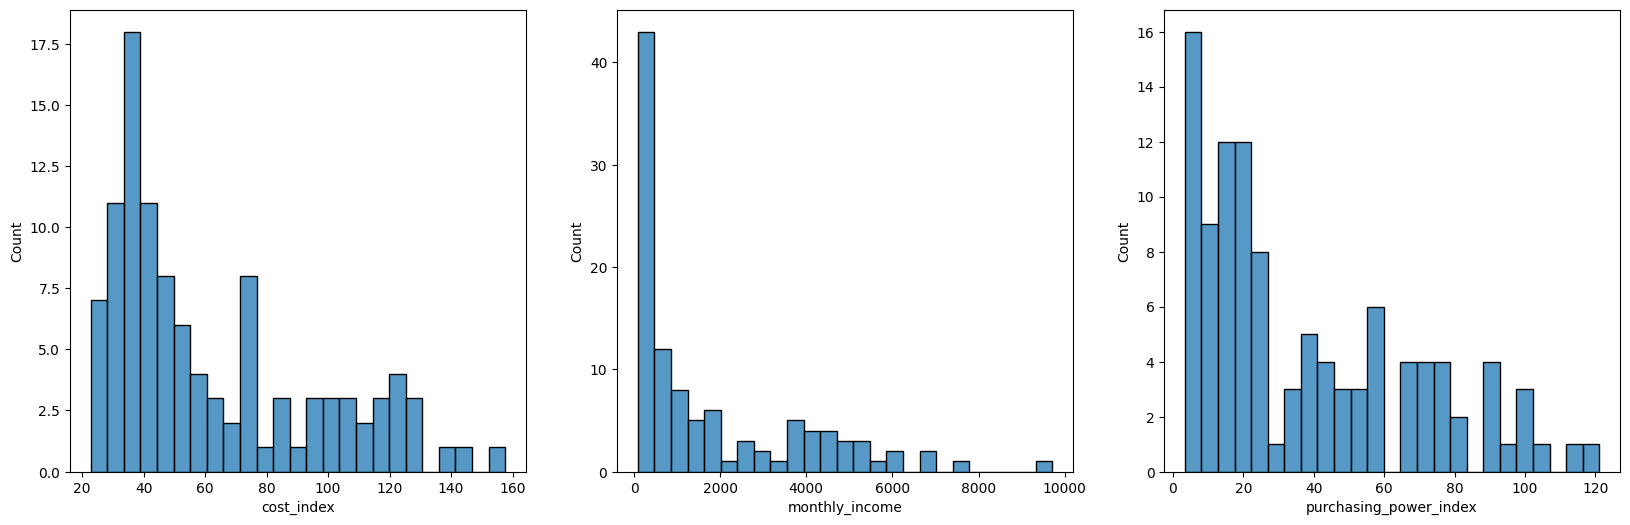

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(data=data, x='cost_index', ax=axes[0], bins =25)
sns.histplot(data=data, x='monthly_income', ax=axes[1], bins =25)
sns.histplot(data=data, x='purchasing_power_index', ax=axes[2], bins =25);

**Normalize Data​**

In [36]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

# create a copy of the dataframe with only numerical variables (ints and floats)
df_to_scale = data[['cost_index', 'monthly_income', 'purchasing_power_index']].copy()

df_to_scale.fillna(0)

,cost_index,monthly_income,purchasing_power_index
0,157.6,9712,105.0
1,142.4,7530,90.1
2,137.9,5281,65.2
3,130.2,4130,54.1
4,128.0,5368,71.5
...,...,...,...
102,27.0,95,6.0
103,25.8,125,8.3
104,25.3,98,6.6
105,23.0,148,10.9


In [37]:
# Initialize the MinMaxScaler


scaler = MinMaxScaler()

# Fit and transform the data

normalized_data = scaler.fit_transform(df_to_scale)

# Convert the normalized data back to a DataFrame (optional)


normalized_data = pd.DataFrame(normalized_data, columns=df_to_scale.columns)

print("Original Data:")
print(df_to_scale)
print("\nNormalized Data:")

print(normalized_data)

Original Data:
     cost_index  monthly_income  purchasing_power_index
0         157.6            9712                   105.0
1         142.4            7530                    90.1
2         137.9            5281                    65.2
3         130.2            4130                    54.1
4         128.0            5368                    71.5
..          ...             ...                     ...
102        27.0              95                     6.0
103        25.8             125                     8.3
104        25.3              98                     6.6
105        23.0             148                    10.9
106        22.8              96                     7.2

[107 rows x 3 columns]

Normalized Data:
     cost_index  monthly_income  purchasing_power_index
0      1.000000        1.000000                0.863212
1      0.887240        0.773299                0.736619
2      0.853858        0.539636                0.525064
3      0.796736        0.420052                

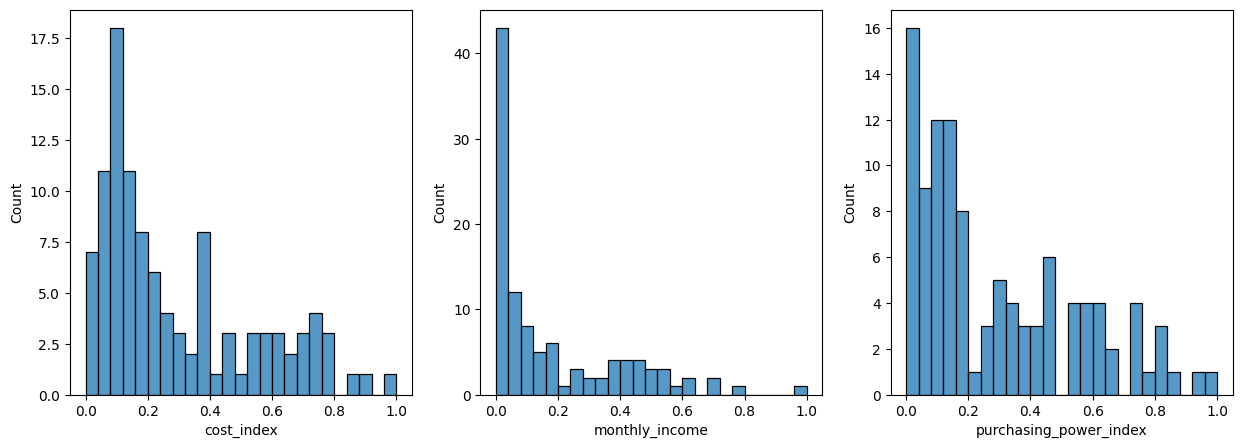

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=normalized_data, x='cost_index', ax=axes[0], bins =25)
sns.histplot(data=normalized_data, x='monthly_income', ax=axes[1], bins =25)
sns.histplot(data=normalized_data, x='purchasing_power_index', ax=axes[2], bins =25);

**Standardize Data​**

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_to_scale= data[['cost_index','monthly_income','purchasing_power_index']].copy()

df_to_scale.fillna(0)

# Initialize the StandardScaler

scaler = StandardScaler()

# Fit and transform the data

scaled_data = scaler.fit_transform(df_to_scale)

# Convert the scaled data back to a DataFrame (optional)

scaled_data = pd.DataFrame(scaled_data, columns=df_to_scale.columns)

print("Original Data:")
print(df_to_scale)
print("\nStandardized Data:")
print(scaled_data)

Original Data:
     cost_index  monthly_income  purchasing_power_index
0         157.6            9712                   105.0
1         142.4            7530                    90.1
2         137.9            5281                    65.2
3         130.2            4130                    54.1
4         128.0            5368                    71.5
..          ...             ...                     ...
102        27.0              95                     6.0
103        25.8             125                     8.3
104        25.3              98                     6.6
105        23.0             148                    10.9
106        22.8              96                     7.2

[107 rows x 3 columns]

Standardized Data:
     cost_index  monthly_income  purchasing_power_index
0      2.829588        3.772161                2.195765
1      2.377068        2.728360                1.706354
2      2.243098        1.652509                0.888479
3      2.013860        1.101907              

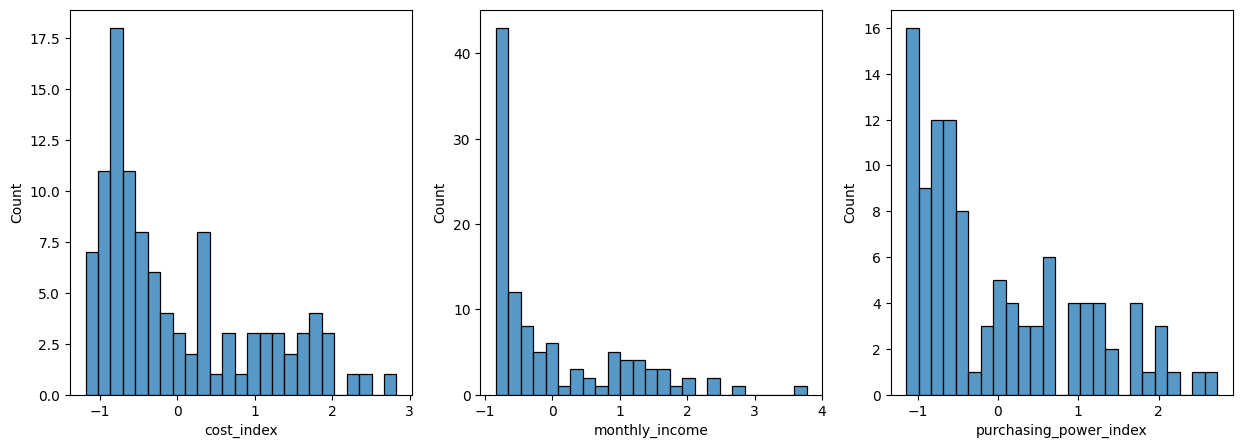

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=scaled_data, x='cost_index', ax=axes[0], bins =25)
sns.histplot(data=scaled_data, x='monthly_income', ax=axes[1], bins =25)
sns.histplot(data=scaled_data, x='purchasing_power_index', ax=axes[2], bins =25);

**Transforming Skewed Data​**

In [41]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import boxcox

<ipython-input-42-f91167624dda>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['monthly_income'],fit=norm, color ="r")


Skew before Log Transformation: 1.370239


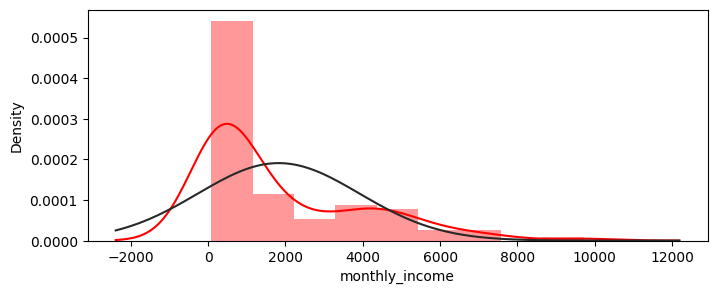

In [42]:
#Plot and check the distribution
plt.figure(figsize=(8,3))
sns.distplot(data['monthly_income'],fit=norm, color ="r")
print("Skew before Log Transformation: %f" % data['monthly_income'].skew())
plt.show()

In [43]:
print("Skew of raw data: %f" % data['monthly_income'].skew()) #check skewness

Skew of raw data: 1.370239




*   Log Transformation



Skew after Log Transformation: 0.029167


<ipython-input-44-1a72afd95b78>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log_monthly_income'], fit=norm,color ="r")


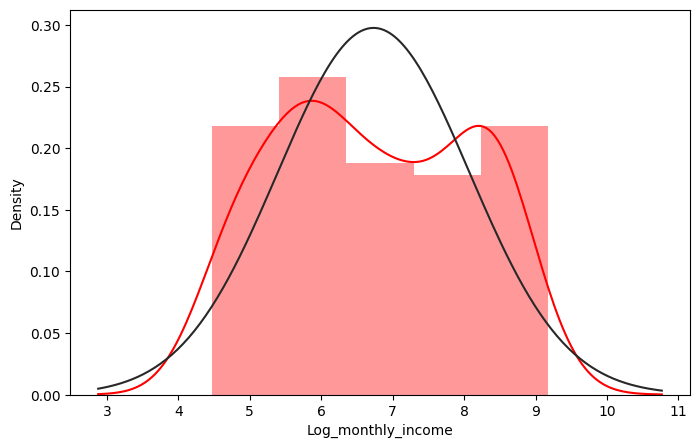

In [44]:
#log transformation
data['Log_monthly_income'] = np.log(data['monthly_income'])

#check distribution and skewness
plt.figure(figsize=(8,5))
sns.distplot(data['Log_monthly_income'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % data['Log_monthly_income'].skew())

Skew after Log Transformation: 0.347039


<ipython-input-45-e7ab31ae2007>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log_cost_index'], fit=norm,color ="r")


count    107.000000
mean       4.002878
std        0.510674
min        3.126761
25%        3.594554
50%        3.889777
75%        4.437153
max        5.060060
Name: Log_cost_index, dtype: float64

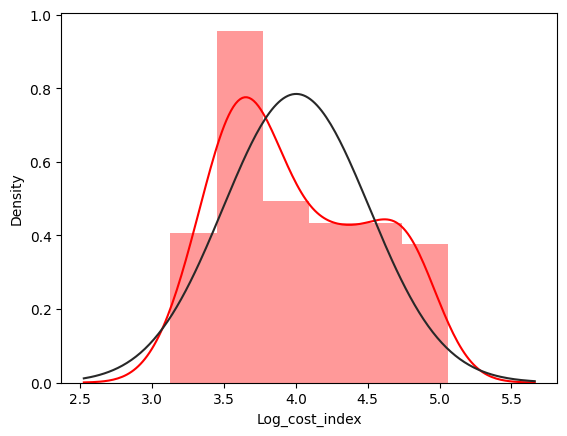

In [45]:
#log transformation
data['Log_cost_index'] = np.log(data['cost_index'])

#check distribution,skewness and kurtosis
sns.distplot(data['Log_cost_index'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % data['Log_cost_index'].skew())
data['Log_cost_index'].describe()



*   Box-Cox Transformation



<ipython-input-46-3fb6fbc22849>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Box_cox,fit=norm, color ="r")


Skew after box cox Transformation: 0.028756


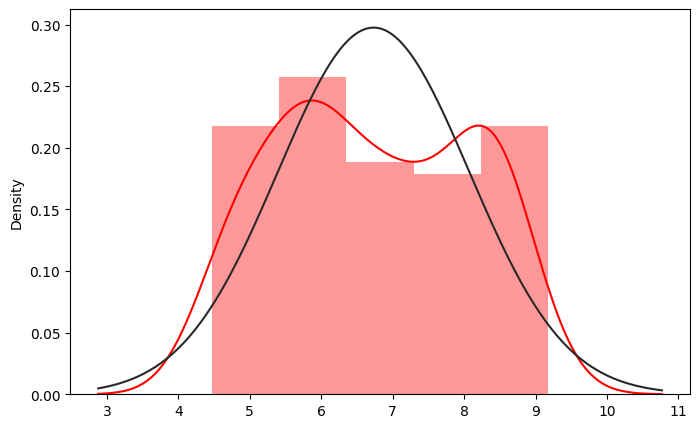

In [46]:
#Box-cox tranformation
Box_cox = st.boxcox(data['monthly_income'],lmbda=0)
plt.figure(figsize=(8,5))
sns.distplot(Box_cox,fit=norm, color ="r")
print("Skew after box cox Transformation: %f" % skew(Box_cox))


**Binning Individual Variable​**

In [47]:
data.describe()

,cost_index,monthly_income,purchasing_power_index,Log_monthly_income,Log_cost_index
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,62.555140,1826.532710,38.150467,6.733090,4.002878
std,33.747716,2100.275033,30.588024,1.347043,0.510674
min,22.800000,87.000000,3.400000,4.465908,3.126761
25%,36.400000,295.000000,14.050000,5.686952,3.594554
50%,48.900000,782.000000,25.800000,6.661855,3.889777
75%,84.550000,3130.000000,59.100000,8.047576,4.437153
max,157.600000,9712.000000,121.100000,9.181118,5.060060


In [48]:
# Define the bin edges and labels
bin_edges = [0, 30, 70, 110, 150, 170]
bin_labels = ['<30', '30-70', '70-110', '110-150', '150+']

# Use Pandas' cut function to perform binning
data['cost_index_group'] = pd.cut(data['cost_index'], bins=bin_edges, labels=bin_labels, right=False)

# Define the bin edges and labels
bin_edges = [0, 800, 5000,10000]  # Define your desired bin edges
bin_labels = ['low', 'middle', 'hight']  # Define labels for each bin

# Use Pandas' cut function to perform binning
data['monthly_income_group'] = pd.cut(data['monthly_income'], bins=bin_edges, labels=bin_labels, right=False)

# Print the DataFrame with the new "Age_Group" column
print(data)
display(data)

            country  cost_index  monthly_income  purchasing_power_index  \
0           Bermuda       157.6            9712                   105.0   
1       Switzerland       142.4            7530                    90.1   
2    Cayman Islands       137.9            5281                    65.2   
3            Israel       130.2            4130                    54.1   
4           Iceland       128.0            5368                    71.5   
..              ...         ...             ...                     ...   
102           Burma        27.0              95                     6.0   
103        Pakistan        25.8             125                     8.3   
104      Kyrgyzstan        25.3              98                     6.6   
105          Angola        23.0             148                    10.9   
106      Tajikistan        22.8              96                     7.2   

     Log_monthly_income  Log_cost_index cost_index_group monthly_income_group  
0              9.18

,country,cost_index,monthly_income,purchasing_power_index,Log_monthly_income,Log_cost_index,cost_index_group,monthly_income_group
0,Bermuda,157.6,9712,105.0,9.181118,5.060060,150+,hight
1,Switzerland,142.4,7530,90.1,8.926650,4.958640,110-150,hight
2,Cayman Islands,137.9,5281,65.2,8.571871,4.926529,110-150,hight
3,Israel,130.2,4130,54.1,8.326033,4.869072,110-150,middle
4,Iceland,128.0,5368,71.5,8.588211,4.852030,110-150,hight
...,...,...,...,...,...,...,...,...
102,Burma,27.0,95,6.0,4.553877,3.295837,<30,low
103,Pakistan,25.8,125,8.3,4.828314,3.250374,<30,low
104,Kyrgyzstan,25.3,98,6.6,4.584967,3.230804,<30,low
105,Angola,23.0,148,10.9,4.997212,3.135494,<30,low


In [49]:
# Define the bin edges and labels

bin_edges_cost = [0, 30, 70, 110, 150, 170]
bin_labels_cost = ['<30', '30-70', '70-110', '110-150', '150+']

# Use Pandas' cut function to perform binning


# Define the bin edges and labels
bin_edges_income = [0, 800, 5000,10000]
bin_labels_income = ['low', 'middle', 'hight']

# Use Pandas' cut function to perform binning

data['cost_index_group'] = pd.cut(data['cost_index'], bins=bin_edges_cost, labels=bin_labels_cost, right=False)
data['monthly_income_group'] = pd.cut(data['monthly_income'], bins=bin_edges_income, labels=bin_labels_income, right=False)

# Print the DataFrame with the new "Age_Group" column
display(data)

,country,cost_index,monthly_income,purchasing_power_index,Log_monthly_income,Log_cost_index,cost_index_group,monthly_income_group
0,Bermuda,157.6,9712,105.0,9.181118,5.060060,150+,hight
1,Switzerland,142.4,7530,90.1,8.926650,4.958640,110-150,hight
2,Cayman Islands,137.9,5281,65.2,8.571871,4.926529,110-150,hight
3,Israel,130.2,4130,54.1,8.326033,4.869072,110-150,middle
4,Iceland,128.0,5368,71.5,8.588211,4.852030,110-150,hight
...,...,...,...,...,...,...,...,...
102,Burma,27.0,95,6.0,4.553877,3.295837,<30,low
103,Pakistan,25.8,125,8.3,4.828314,3.250374,<30,low
104,Kyrgyzstan,25.3,98,6.6,4.584967,3.230804,<30,low
105,Angola,23.0,148,10.9,4.997212,3.135494,<30,low
